#IMPORTS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_theme(style="whitegrid")


#LOAD DATASET

In [2]:
def load_iris_dataset() -> pd.DataFrame:
    """
    Loads the Iris dataset from seaborn and returns a pandas DataFrame.
    """
    df = sns.load_dataset("iris")
    return df

df = load_iris_dataset()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#DATA INSPECTION & PREPROCESSING

In [3]:
def inspect_data(df: pd.DataFrame) -> None:
    """
    Prints key diagnostics to understand structure, types, missing values, and summary stats.
    """
    print("=== Info ===")
    df.info()

    print("\n=== Missing Values ===")
    print(df.isna().sum())

    print("\n=== Describe (numeric) ===")
    print(df.describe())

inspect_data(df)


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

=== Missing Values ===
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

=== Describe (numeric) ===
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.80

Preprocessing decisions:
1. The dataset is typically clean (no missing values).
2. Features are numeric; target is categorical (species).
3. We will standardize features for fair model learning.

#EXPLORATORY DATA ANALYSIS

SCATTER PLOT

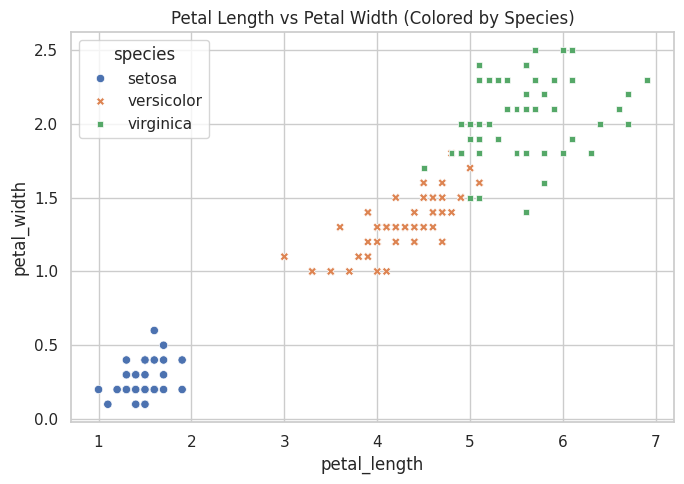

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x="petal_length",
    y="petal_width",
    hue="species",
    style="species"
)
plt.title("Petal Length vs Petal Width (Colored by Species)")
plt.tight_layout()
plt.show()


HISTOGRAM

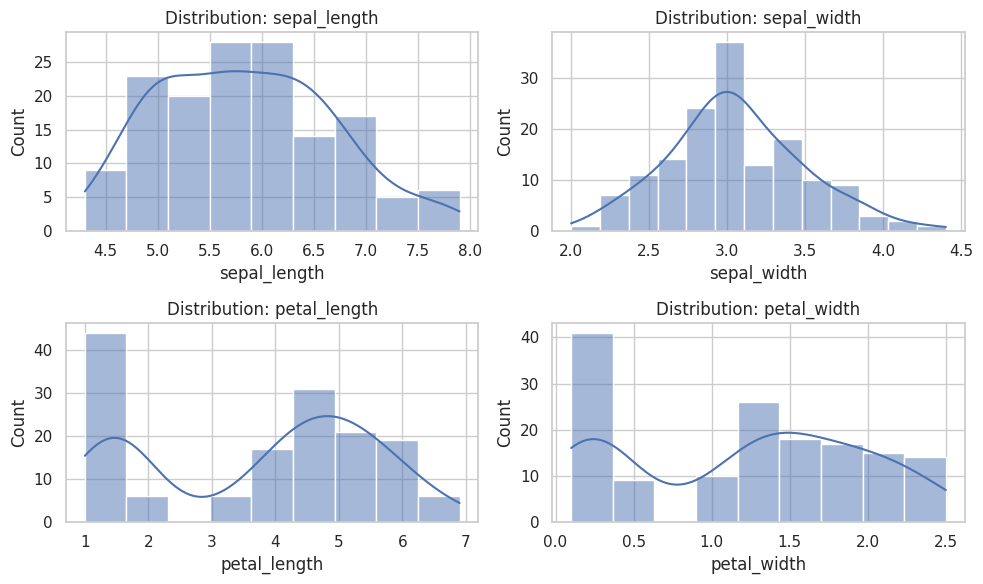

In [5]:
numeric_cols = df.select_dtypes(include="number").columns

plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()


BOX PLOT

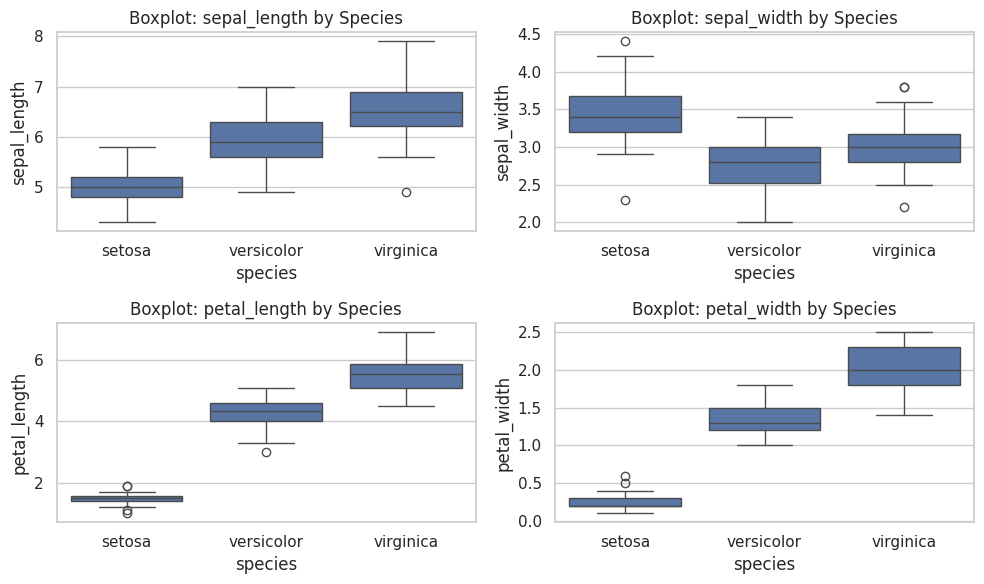

In [6]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="species", y=col)
    plt.title(f"Boxplot: {col} by Species")
plt.tight_layout()
plt.show()


PAIR PLOT

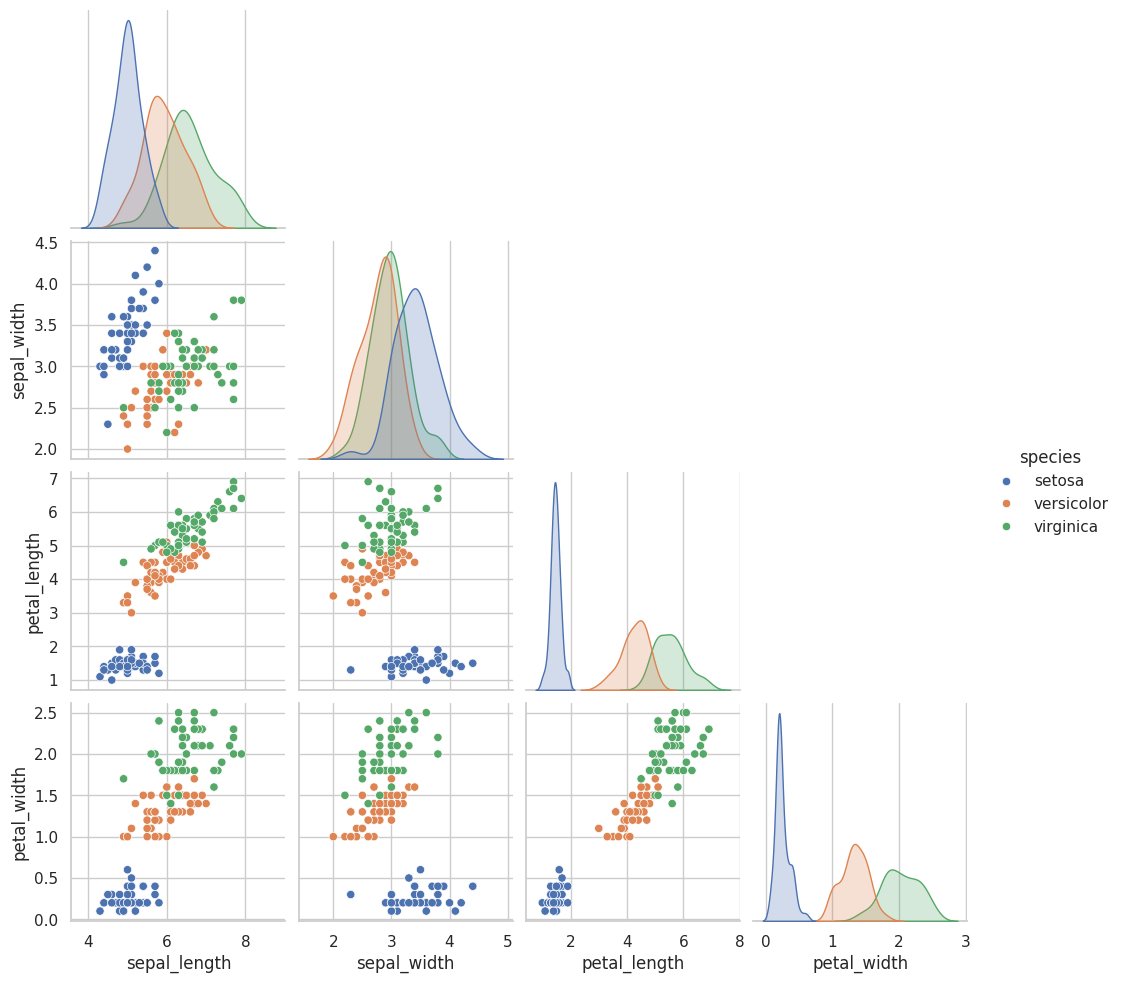

In [7]:
sns.pairplot(df, hue="species", corner=True)
plt.show()


EDA INTERPRETATION:
1. Petal measurements often show strong separation between species (especially setosa).
2. Sepal features overlap more (harder separation).
3. Boxplots help identify potential outliers and compare spread across classes.

#MODEL TRAINING AND EVALUATION

TRAIN TEST SPLIT

In [8]:
def split_features_target(df: pd.DataFrame, target_col: str = "species"):
    """
    Splits dataframe into X (features) and y (target).
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

X, y = split_features_target(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (120, 4)  Test size: (30, 4)


PIPELINE

In [9]:
def build_model_pipeline():
    """
    Builds a robust sklearn pipeline:
    - StandardScaler for feature normalization
    - LogisticRegression as a strong baseline classifier
    """
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000, multi_class="auto"))
    ])
    return pipeline

model = build_model_pipeline()
model


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

TRAIN

In [10]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

EVALUATE

Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



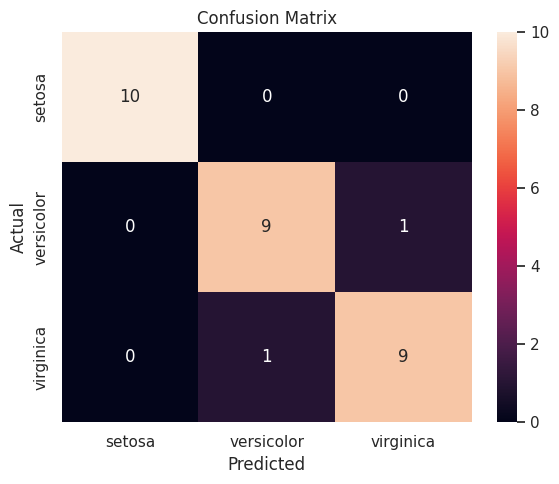

In [11]:
def evaluate_model(model, X_test, y_test) -> None:
    """
    Prints accuracy, classification report, and plots confusion matrix.
    """
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

evaluate_model(model, X_test, y_test)


#FINAL INSIGHTS

RESULTS SUMMARY

*   The baseline model (Logistic Regression with standardized features)
*   The baseline model (Logistic Regression with standardized features)
*   typically achieves high accuracy on Iris.
*   Most errors (if any) tend to occur between versicolor and virginica, which have more overlapping feature ranges.

KEY INSIGHTS FROM EDA

*   Petal length/width are the most discriminative features.
*   Setosa is usually easily separable from the other two species.
*   Outliers are limited; distribution looks fairly well-behaved.

PRACTICAL NEXT STEPS

*   Try additional models (KNN, SVM, Random Forest) and compare.
*   Use cross-validation for more robust evaluation.
*   Plot feature importance (or coefficients) to interpret model behavior.